We start by simulating a perfect liner relationship, fit the regression

In [35]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(color_codes=True) 


a1 = 1
b1 = 3.3
x1 = np.random.uniform(0, 10, 1000)
y1 = a1 + b1*x1 



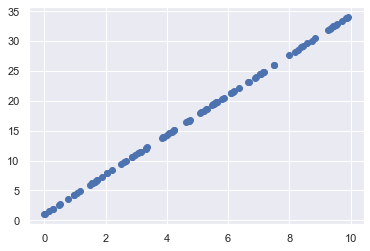

In [28]:
plt.scatter(x1,y1)
plt.show()


In [30]:
model1 = sm.OLS(y1,x1).fit()
print(model1.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.492e+05
Date:                Thu, 14 May 2020   Prob (F-statistic):                   3.74e-159
Time:                        14:53:25   Log-Likelihood:                         -73.549
No. Observations:                 100   AIC:                                      149.1
Df Residuals:                      99   BIC:                                      151.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The estimated coefficient in the regression above is equal to 3.48 with a confidence interval between 3.46 and 3.501.  The real coefficient is 3.3 and is outside of the confidence interval calculated above. I wonder why that's the case?


We simulate 1000 observations from a uniform distribution. We also simulate an error component from a normal distribution with mean 0 and standard deviation 3. We use these simulated values to create a series of linear models to check and test regression assumptions

In [36]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt 
a2 = 1
b2 = 3.3
x2 = np.random.uniform(0, 10, 1000)
e2 = np.random.normal(0,3,1000)
y2 = a2 + b2*x2 + e2

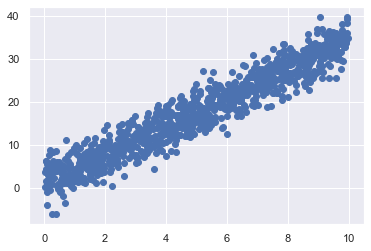

In [32]:
plt.scatter(x2,y2)
plt.show()


In [33]:
model2 = sm.OLS(y2,x2).fit()
print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                          4.601e+04
Date:                Thu, 14 May 2020   Prob (F-statistic):                        0.00
Time:                        14:55:24   Log-Likelihood:                         -2488.6
No. Observations:                1000   AIC:                                      4979.
Df Residuals:                     999   BIC:                                      4984.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

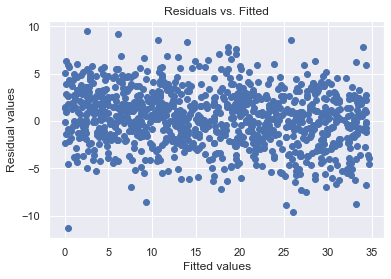

In [12]:
residuals2 = model2.resid
fitted2 = model2.fittedvalues
#ax.set_ylabel('Residuals')
#ax.set_xlabel('Fitted Values')
#ax.set_title('Residuals vs. Fitted')
plt.scatter(fitted2, residuals2)
plt.title('Residuals vs. Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residual values')
plt.show()

We will simulate the same model as the one above but with heteroskedastic error and see how if it affects the coefficients or confidence interval estimates. 

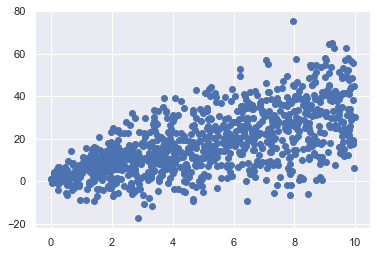

In [39]:
a3 = 1
b3 = 3.3
x3 = np.random.uniform(0, 10, 1000)
e3 = np.random.normal(0,5*np.sqrt(x3),1000)
y3 = a3 + b3*x3 + e3
plt.scatter(x3,y3)
plt.show()

In [40]:
model3 = sm.OLS(y3,x3).fit()
print(model3.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.762
Model:                            OLS   Adj. R-squared (uncentered):              0.761
Method:                 Least Squares   F-statistic:                              3193.
Date:                Thu, 14 May 2020   Prob (F-statistic):                   2.33e-313
Time:                        15:00:31   Log-Likelihood:                         -3835.2
No. Observations:                1000   AIC:                                      7672.
Df Residuals:                     999   BIC:                                      7677.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The coefficient of the regression with heteroskedastic errors is 3.44 which isn't different from the first and second model. In other words, the heteroskedasticy doesn't impact the coefficient estimate. The impact of the heteroskedasticity is on the on the confidence intervals around the mean estimate that increased from 3.41 - 3.47 to 3.17 - 3.66 